##### Copyright 2019 The TensorFlow Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 팬더 DataFrame 로드하기

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/tutorials/load_data/pandas_dataframe"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행하기</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/load_data/pandas_dataframe.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드하기</a></td>
</table>

이 튜토리얼에서는 <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html" class="external">pandas DataFrames</a>를 TensorFlow에 로드하는 방법의 예를 보여줍니다.

UCI Machine Learning Repository에서 제공하는 작은 <a href="https://archive.ics.uci.edu/ml/datasets/heart+Disease" class="external">심장 질환 데이터세트</a>를 사용합니다. CSV에는 수백 개의 행이 있습니다. 각 행은 환자를 설명하고 각 열은 속성을 설명합니다. 이 정보를 사용하여 환자에게 심장병이 있는지 여부를 예측합니다. 이것은 이진 분류 작업에 해당합니다.

## pandas를 사용하여 데이터 읽기

In [1]:
import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2


import pandas as pd
import tensorflow as tf

SUHFFLE_BUFFER = 500
BATCH_SIZE = 2

심장 질환 데이터세트가 포함된 CSV 파일 다운로드:

In [2]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

13273/13273 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


팬더를 사용하여 CSV 파일 읽기:

In [3]:
df = pd.read_csv(csv_file)
df = pd.read_csv(csv_file)

데이터는 다음과 같습니다.

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [5]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


`target` 열에 포함된 레이블을 예측하는 모델을 빌드합니다.

In [7]:
target = df.pop('target')

# target = df.pop('target')

KeyError: 'target'

## 배열로서의 DataFrame

데이터에 균일한 데이터 유형 또는 `dtype`이 있는 경우 NumPy 배열을 사용할 수 있는 모든 곳에서 pandas DataFrame을 사용할 수 있습니다. 이렇게 될 수 있는 이유는 `pandas.DataFrame` 클래스가 `__array__` 프로토콜을 지원하고 TensorFlow의 `tf.convert_to_tensor` 함수가 이 프로토콜을 지원하는 객체를 허용하기 때문입니다.

데이터세트에서 숫자 특성을 가져옵니다(지금은 범주형 특성을 건너뜀).

In [8]:
numeric_feature_names = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']
numeric_features = df[numeric_feature_names]
numeric_features.head()

# numeric_feature_names = ['age', 'thalach', 'trestbps', 'chol', 'oldpeak']
# numeric_features = df[numeric_feature_names]
# numeric_feature.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


DataFrame은 `DataFrame.values` 속성 또는 `numpy.array(df)`를 사용하여 NumPy 배열로 변환할 수 있습니다. 텐서로 변환하려면 `tf.convert_to_tensor`를 사용하세요.

In [9]:
tf.convert_to_tensor(numeric_features)
# tf.convert_to_tensor(numeric_feautres)

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

일반적으로 `tf.convert_to_tensor`를 사용하여 객체를 텐서로 변환할 수 있는 경우 `tf.Tensor`를 전달할 수 있는 곳이면 어디든지 이를 전달할 수 있습니다.

### Model.fit과 함께 사용하기

단일 텐서로 해석되는 DataFrame은 `Model.fit` 메서드에 대한 인수로 직접 사용할 수 있습니다.

다음은 데이터세트의 수치적 특성에 대한 모델 훈련의 예입니다.

첫 단계는 입력 범위를 정규화하는 것입니다. 이를 위해 `tf.keras.layers.Normalization` 레이어를 사용합니다.

레이어를 실행하기 전에 해당 평균과 표준편차를 설정하려면 `Normalization.adapt` 메서드를 호출해야 합니다.

In [10]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)

# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(numeric_features)

UnboundLocalError: local variable 'input_shape' referenced before assignment

DataFrame의 처음 세 행에서 레이어를 호출하여 이 레이어의 출력 예를 시각화합니다.

In [11]:
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6]], dtype=float32)>

정규화 레이어를 단순 모델의 첫 번째 레이어로 사용합니다.

In [12]:
from os import access
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model


DataFrame을 `Model.fit`에 `x` 인수로 전달하면 Keras는 DataFrame을 NumPy 배열인 것처럼 취급합니다.

In [13]:
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

# model = get_basic_model()
# model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5929 - loss: 3.1890
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - loss: 1.5506
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7279 - loss: 0.5703
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7449 - loss: 0.5392
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7182 - loss: 0.5990
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7562 - loss: 0.5593
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7791 - loss: 0.4841
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7075 - loss: 0.5767
Epoch 9/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7544 - loss: 0.5690
Epoch 10/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7808 - loss: 0.4767
Epoch 11/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7674 - loss: 0.5295
Epoch 12/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

### tf.data와 함께 사용하기

`tf.data` 변환을 균일한 `dtype`의 DataFrame에 적용하려는 경우 `Dataset.from_tensor_slices` 메서드는 DataFrame의 행을 반복하는 데이터세트를 생성합니다. 각 행은 처음에 값으로 구성된 벡터입니다. 모델을 훈련시키려면 `(inputs, labels)` 쌍이 필요하므로 `(features, labels)`을 전달하면 `Dataset.from_tensor_slices`가 필요한 슬라이스 쌍을 반환합니다.

In [14]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))

for row in numeric_dataset.take(3):
  print(row)


# numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))

# for row in numeric_dataset.take(3):
#   print(row)

(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 63. , 150. , 145. , 233. ,   2.3])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 108. , 160. , 286. ,   1.5])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 129. , 120. , 229. ,   2.6])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [15]:
numeric_batches = numeric_dataset.shuffle(1000).batch(BATCH_SIZE)

model = get_basic_model()
model.fit(numeric_batches, epochs=15)

Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7441 - loss: 2.8508
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6726 - loss: 1.4004
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7358 - loss: 1.1499
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7448 - loss: 0.9909
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6984 - loss: 1.2146
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.8685
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7068 - loss: 0.8277
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7647 - loss: 0.7478
Epoch 9/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7333 - loss: 0.6994
Epoch 10/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7234 - loss: 0.6641
Epoch 11/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7487 - loss: 0.5766
Epoch 12/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

## DataFrame을 사전으로 사용

이기종 데이터를 다루기 시작하면 DataFrame을 더 이상 단일 배열인 것처럼 취급할 수 없습니다. TensorFlow 텐서는 모든 요소의 `dtype`이 같을 것을 요구합니다.

따라서 이 경우, 이를 각 열에 균일한 `dtype`이 있는 열 사전으로 취급해야 합니다. DataFrame은 배열 사전과 매우 유사하므로 일반적으로 DataFrame을 Python dict로 캐스팅하기만 하면 됩니다. 많은 중요한 TensorFlow API가 배열의 (중첩) 사전을 입력으로 지원합니다.

`tf.data` 입력 파이프라인은 이것을 아주 잘 처리합니다. 모든 `tf.data` 연산이 사전과 튜플을 자동으로 처리합니다. 따라서 DataFrame에서 사전-예제의 데이터세트를 만들려면 `Dataset.from_tensor_slices`로 슬라이싱하기 전에 dict로 캐스팅하면 됩니다.

In [16]:
numeric_dict_ds = tf.data.Dataset.from_tensor_slices((dict(numeric_features), target))

# numeric_dict_ds = tf.data.Dataset.from_tensor_slices((dict(numeric_features), target))

다음은 해당 데이터세트의 처음 세 가지 예입니다.

In [17]:
for row in numeric_dict_ds.take(3):
  print(row)

({'age': <tf.Tensor: shape=(), dtype=int64, numpy=63>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=150>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=145>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=233>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.3>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=108>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=160>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=286>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=1.5>}, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=129>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=120>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=229>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.6>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


### Keras를 사용한 사전

일반적으로 Keras 모델과 레이어는 단일 입력 텐서를 기대하지만 이러한 클래스는 사전, 튜플 및 텐서의 중첩 구조를 허용하고 반환할 수 있습니다. 이러한 구조를 "중첩"이라고 합니다(자세한 내용은 `tf.nest` 모듈 참조).

사전을 입력으로 받아들이는 Keras 모델을 작성할 수 있는 동등한 효과의 두 가지 방법이 있습니다.

#### 1. 모델-서브 클래스 스타일

`tf.keras.Model`(또는 `tf.keras.Layer`)의 서브 클래스를 작성합니다. 입력을 직접 처리하고 출력을 생성합니다.

In [18]:
  def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
      values.append(tf.cast(inputs[key], tf.float32))

    return fun(values, axis=-1)

  # def stack_dict(inputs, fun=tf.stack):
  #   values = []
  #   for key in sorted(inputs.keys()):
  #     values.append(tf.cast(inputs[key], tf.float32))

    # return fun(values, axis=-1)

In [19]:
#@title
class MyModel(tf.keras.Model):
  def __init__(self):
    # Create all the internal layers in init.
    super().__init__(self)

    self.normalizer = tf.keras.layers.Normalization(axis=-1)

    self.seq = tf.keras.Sequential([
      self.normalizer,
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

  def adapt(self, inputs):
    # Stack the inputs and `adapt` the normalization layer.
    inputs = stack_dict(inputs)
    self.normalizer.adapt(inputs)

  def call(self, inputs):
    # Stack the inputs
    inputs = stack_dict(inputs)
    # Run them through all the layers.
    result = self.seq(inputs)

    return result

model = MyModel()

model.adapt(dict(numeric_features))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

TypeError: Layer.__init__() takes 1 positional argument but 2 were given

이 모델은 학습을 위해 열 사전 또는 사전-요소의 데이터세트를 허용할 수 있습니다.

In [20]:
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7184 - loss: 0.7284
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7643 - loss: 0.6056
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7609 - loss: 0.6173
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7583 - loss: 0.5861
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7203 - loss: 0.6111


In [21]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 5), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs={'age': 'tf.Tensor(shape=(None,), dtype=int64)', 'thalach': 'tf.Tensor(shape=(None,), dtype=int64)', 'trestbps': 'tf.Tensor(shape=(None,), dtype=int64)', 'chol': 'tf.Tensor(shape=(None,), dtype=int64)', 'oldpeak': 'tf.Tensor(shape=(None,), dtype=float32)'}
  • training=True
  • mask={'age': 'None', 'thalach': 'None', 'trestbps': 'None', 'chol': 'None', 'oldpeak': 'None'}

다음은 처음 세 가지 예에 대한 예측입니다.

In [22]:
model.predict(dict(numeric_features.iloc[:3]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


array([[-0.8802321],
       [-0.9403838],
       [-0.9403838]], dtype=float32)

#### 2. Keras의 기능적 스타일

In [23]:
inputs = {}
for name, column in numeric_features.items():
  inputs[name] = tf.keras.Input(
      shape=(1,), name=name, dtype=tf.float32)

inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=age>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=thalach>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=chol>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=None, name=oldpeak>}

In [24]:
x = stack_dict(inputs, fun=tf.concat)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(numeric_features)))

x = normalizer(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


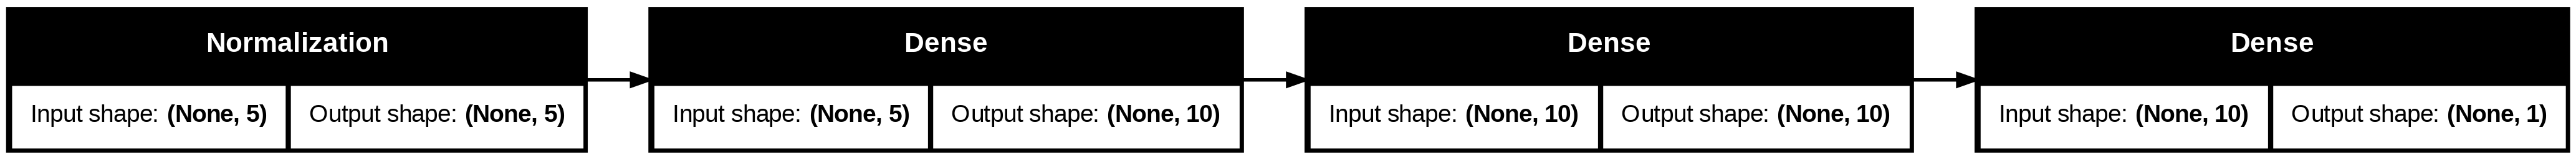

In [26]:
tf.keras.utils.plot_model(model, rankdir="LR", show_shapes=True)

모델 서브 클래스와 동일한 방식으로 기능적 모델을 훈련할 수 있습니다.

In [27]:
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6739 - loss: 0.6564
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7291 - loss: 0.6182
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6979 - loss: 0.6284
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7093 - loss: 0.6433
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7179 - loss: 0.6232


In [28]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 5), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs={'age': 'tf.Tensor(shape=(None,), dtype=int64)', 'thalach': 'tf.Tensor(shape=(None,), dtype=int64)', 'trestbps': 'tf.Tensor(shape=(None,), dtype=int64)', 'chol': 'tf.Tensor(shape=(None,), dtype=int64)', 'oldpeak': 'tf.Tensor(shape=(None,), dtype=float32)'}
  • training=True
  • mask={'age': 'None', 'thalach': 'None', 'trestbps': 'None', 'chol': 'None', 'oldpeak': 'None'}

## 전체 예제

Keras에 이기종 DataFrame을 전달하는 경우 각 열에 고유한 사전 처리가 필요할 수 있습니다. DataFrame에서 직접 이 전처리를 수행할 수 있지만 모델이 올바르게 작동하려면 입력이 항상 동일한 방식으로 전처리되어야 합니다. 따라서 가장 좋은 방법은 전처리를 모델에 구축하는 것입니다. [Keras 전처리 레이어](https://www.tensorflow.org/guide/keras/preprocessing_layers)로 많은 일반적인 작업이 처리됩니다.

### 전처리 헤드 빌드하기

이 데이터세트에서 원시 데이터의 일부 "정수" 특성은 실제로 범주형 인덱스입니다. 이러한 인덱스는 실제로 순서가 지정된 숫자 값이 아닙니다(자세한 내용은 <a href="https://archive.ics.uci.edu/ml/datasets/heart+Disease" class="external">데이터세트 설명</a> 참조). 이것들은 순서가 없기 때문에 모델에 직접 입력하는 것은 부적절합니다. 모델은 이를 순서가 지정된 것으로 해석하기 때문입니다. 이러한 입력을 사용하려면 원-핫 벡터 또는 임베딩 벡터로 인코딩이 필요합니다. 문자열 범주형 특성의 경우도 마찬가지입니다.

참고: 동일한 전처리가 필요한 특성이 많은 경우 전처리를 적용하기 전에 이들을 함께 연결하는 것이 더 효율적입니다.

반면에 이진 특성은 일반적으로 인코딩하거나 정규화할 필요가 없습니다.

먼저 각 그룹에 속하는 특성 목록을 작성합니다.

In [29]:
binary_feature_names = ['sex', 'fbs', 'exang']

In [30]:
categorical_feature_names = ['cp', 'restecg', 'slope', 'thal', 'ca']

다음으로, 각 입력에 적절한 전처리를 적용하고 결과를 연결하는 전처리 모델을 구축합니다.

이 섹션에서는 [Keras Functional API](https://www.tensorflow.org/guide/keras/functional)를 사용하여 전처리를 구현합니다. 데이터 프레임의 각 열에 대해 하나의 `tf.keras.Input`을 생성하는 것으로 시작합니다.

In [31]:
inputs = {}
for name, column in df.items():
  if type(column[0]) == str:
    dtype = tf.string
  elif (name in categorical_feature_names or
        name in binary_feature_names):
    dtype = tf.int64
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(), name=name, dtype=dtype)

In [32]:
inputs

{'age': <KerasTensor shape=(None,), dtype=float32, sparse=None, name=age>,
 'sex': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=sex>,
 'cp': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=cp>,
 'trestbps': <KerasTensor shape=(None,), dtype=float32, sparse=None, name=trestbps>,
 'chol': <KerasTensor shape=(None,), dtype=float32, sparse=None, name=chol>,
 'fbs': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=fbs>,
 'restecg': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=restecg>,
 'thalach': <KerasTensor shape=(None,), dtype=float32, sparse=None, name=thalach>,
 'exang': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=exang>,
 'oldpeak': <KerasTensor shape=(None,), dtype=float32, sparse=None, name=oldpeak>,
 'slope': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=slope>,
 'ca': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=ca>,
 'thal': <KerasTensor shape=(None,), dtype=string, sparse=None, name=thal>

각 입력에 대해 Keras 레이어와 TensorFlow ops를 사용하여 일부 변환을 적용합니다. 각 특성은 스칼라 배치로 시작합니다(`shape=(batch,)`). 각각의 출력은 `tf.float32` 벡터의 배치여야 합니다(`shape=(batch, n)`). 마지막 단계로 모든 벡터를 함께 연결합니다.


#### 이진 입력

이진 입력은 전처리가 필요하지 않으므로 벡터 축을 추가하고 이를 `float32`로 캐스팅한 다음 전처리된 입력 목록에 추가하기만 하면 됩니다.

In [33]:
preprocessed = []

for name in binary_feature_names:
  inp = inputs[name]
  inp = inp[:, tf.newaxis]
  float_value = tf.cast(inp, tf.float32)
  preprocessed.append(float_value)

preprocessed

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


#### 숫자 입력

이전 섹션에서와 같이 이러한 숫자 입력도 사용 전에 `tf.keras.layers.Normalization` 레이어를 통해 실행해야 할 것입니다. 다만 이번에는 dict로 입력된다는 차이가 있습니다. 아래 코드는 DataFrame에서 숫자 특성을 수집하고 적층한 다음 `Normalization.adapt` 메서드에 전달합니다.

In [34]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(numeric_features)))

아래 코드는 숫자 특성을 적층하고 정규화 계층을 통해 실행합니다.

In [35]:
numeric_inputs = {}
for name in numeric_feature_names:
  numeric_inputs[name]=inputs[name]

numeric_inputs = stack_dict(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


#### 범주형 특성

범주형 특성을 사용하려면 먼저 이를 이진 벡터 또는 임베딩으로 인코딩해야 합니다. 이러한 특성에는 소수의 범주만 포함되어 있으므로 `tf.keras.layers.StringLookup` 및 `tf.keras.layers.IntegerLookup` 레이어 모두에서 지원하는 `output_mode='one_hot'` 옵션을 사용하여 입력을 원-핫 벡터로 직접 변환합니다.

다음은 이러한 레이어가 작동하는 방식의 예입니다.

In [36]:
vocab = ['a','b','c']
lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
lookup(['c','a','a','b','zzz'])

<tf.Tensor: shape=(5, 4), dtype=int64, numpy=
array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])>

In [37]:
vocab = [1,4,7,99]
lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

lookup([-1,4,1])

<tf.Tensor: shape=(3, 5), dtype=int64, numpy=
array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])>

각 입력에 대한 어휘를 결정하려면 해당 어휘를 원-핫 벡터로 변환하는 레이어를 만듭니다.

In [38]:
for name in categorical_feature_names:
  vocab = sorted(set(df[name]))
  print(f'name: {name}')
  print(f'vocab: {vocab}\n')

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

  x = inputs[name][:, tf.newaxis]
  x = lookup(x)
  preprocessed.append(x)

name: cp
vocab: [0, 1, 2, 3, 4]

name: restecg
vocab: [0, 1, 2]

name: slope
vocab: [1, 2, 3]

name: thal
vocab: ['1', '2', 'fixed', 'normal', 'reversible']

name: ca
vocab: [0, 1, 2, 3]



#### 전처리 헤드 조립하기

이 시점에서 `preprocessed`는 모든 전처리 결과의 Python 목록일 뿐이며 각 결과의 형상은 `(batch_size, depth)`입니다.

In [39]:
preprocessed

[<KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_12>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_14>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_16>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_18>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_20>]

`depth` 축을 따라 전처리된 모든 특성을 연결하여 각 사전-예제가 단일 벡터로 변환되도록 합니다. 벡터에는 범주형 특성, 숫자 특성 및 범주형 원-핫 특성이 포함됩니다.

In [40]:
preprocesssed_result = tf.concat(preprocessed, axis=-1)
preprocesssed_result

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


이제 해당 계산에서 모델을 생성하여 재사용할 수 있도록 합니다.

In [41]:
preprocessor = tf.keras.Model(inputs, preprocesssed_result)

NameError: name 'preprocesssed_result' is not defined

In [42]:
tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True)

NameError: name 'preprocessor' is not defined

전처리기를 테스트하려면 <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html" class="external">DataFrame.iloc</a> 접근자를 사용하여 DataFrame에서 첫 번째 예제를 조각화합니다. 그런 다음 이를 사전으로 변환하고 사전을 전처리기에 전달합니다. 결과적으로 얻어지는 것은 이진 특성, 정규화된 숫자 특성 및 원-핫 범주 특성을 순서대로 포함하는 단일 벡터입니다.

In [43]:
preprocessor(dict(df.iloc[:1]))

NameError: name 'preprocessor' is not defined

### 모델 생성 및 훈련

이제 모델의 본문을 만듭니다. 이전 예와 동일한 구성을 사용합니다. 바로, 몇 개의 `Dense` rectified-linear 레이어와 분류를 위한 `Dense(1)` 출력 레이어입니다.

In [45]:
body = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])

이제 Keras functional API를 사용하여 두 조각을 함께 연결합니다.

In [46]:
inputs

{'age': <KerasTensor shape=(None,), dtype=float32, sparse=None, name=age>,
 'sex': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=sex>,
 'cp': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=cp>,
 'trestbps': <KerasTensor shape=(None,), dtype=float32, sparse=None, name=trestbps>,
 'chol': <KerasTensor shape=(None,), dtype=float32, sparse=None, name=chol>,
 'fbs': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=fbs>,
 'restecg': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=restecg>,
 'thalach': <KerasTensor shape=(None,), dtype=float32, sparse=None, name=thalach>,
 'exang': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=exang>,
 'oldpeak': <KerasTensor shape=(None,), dtype=float32, sparse=None, name=oldpeak>,
 'slope': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=slope>,
 'ca': <KerasTensor shape=(None,), dtype=int64, sparse=None, name=ca>,
 'thal': <KerasTensor shape=(None,), dtype=string, sparse=None, name=thal>

In [47]:
x = preprocessor(inputs)
x

NameError: name 'preprocessor' is not defined

In [48]:
result = body(x)
result

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_25>

In [49]:
model = tf.keras.Model(inputs, result)

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

이 모델은 입력 사전을 예상합니다. 데이터를 전달하는 가장 간단한 방법은 DataFrame을 dict로 변환하고 해당 dict를 `Model.fit`에 `x` 인수로 전달하는 것입니다.

In [50]:
history = model.fit(dict(df), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7674 - loss: 0.6300
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7362 - loss: 0.5250
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7332 - loss: 0.5086
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7651 - loss: 0.4333
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7667 - loss: 0.4555


`tf.data`를 사용해도 됩니다.

In [51]:
ds = tf.data.Dataset.from_tensor_slices((
    dict(df),
    target
))

ds = ds.batch(BATCH_SIZE)

In [52]:
import pprint

for x, y in ds.take(1):
  pprint.pprint(x)
  print()
  print(y)

{'age': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([63, 67])>,
 'ca': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 3])>,
 'chol': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([233, 286])>,
 'cp': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 4])>,
 'exang': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 1])>,
 'fbs': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 0])>,
 'oldpeak': <tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.3, 1.5])>,
 'restecg': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([2, 2])>,
 'sex': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1])>,
 'slope': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([3, 2])>,
 'thal': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'fixed', b'normal'], dtype=object)>,
 'thalach': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([150, 108])>,
 'trestbps': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([145, 160])>}

tf.Tensor([0 1], shape=(2,), dtype=int64)


In [53]:
history = model.fit(ds, epochs=5)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7511 - loss: 0.4355
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7511 - loss: 0.4322
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7511 - loss: 0.4306
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7511 - loss: 0.4298
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7511 - loss: 0.4295
